In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

ticker = "AAPL"
start = datetime(now.year-10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400
2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600
2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400
2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000
2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200
...,...,...,...,...,...
2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400
2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600
2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400
2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000
2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100
2025-03-27,223.850006,224.990005,220.559998,221.389999,37094800
2025-03-28,217.899994,223.809998,217.679993,221.669998,39784100


# 2. Data Exploration & Visualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,99.011135,99.984470,97.931973,98.923229,1.127432e+08
std,68.034479,68.678216,67.301406,67.965043,6.552328e+07
min,20.674532,20.978911,20.475431,20.596728,2.323470e+07
25%,36.698788,37.061212,36.409299,36.749522,6.901545e+07
50%,74.798157,75.156480,73.281795,73.694328,9.684900e+07
75%,156.940392,159.396869,155.026861,157.256139,1.373042e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400
2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600
2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400
2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000
2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400
1,2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600
2,2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400
3,2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000
4,2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200


Text(0, 0.5, 'Close Price')

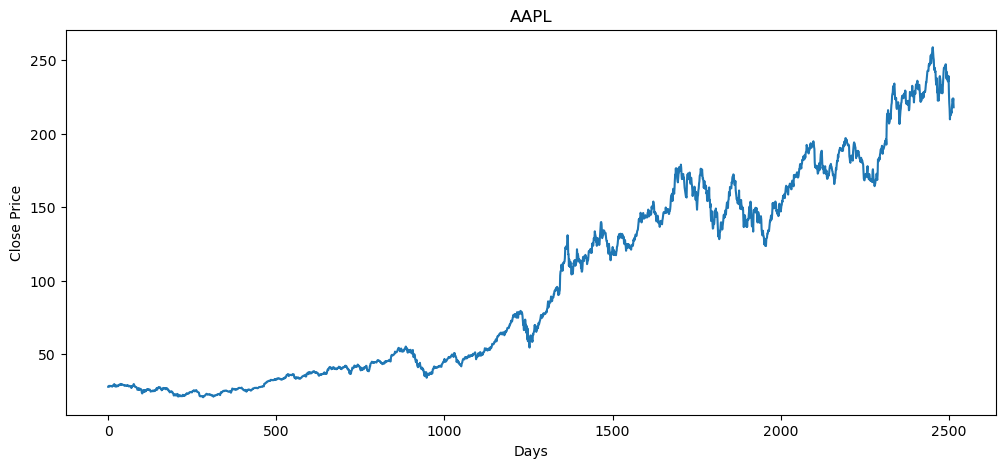

In [13]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

In [14]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
# MA of 5 days ==> null null null null 30 40

In [15]:
# Calculating the moving average
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
if len(temp_df) < 5:
    print('null\n' * len(temp_df), end="")
else:
    print('null\n' * 4, end="")
for i in range(4, len(temp_df)):
    print(sum(temp_df[i-4:i+1])//5)

null
null
null
null
30
40
50
60
70
80


In [16]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [17]:
df1['MA_5'] = df1.rolling(5).mean()

In [18]:
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


## 100 days Moving Average

In [19]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400,NaN
1,2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600,NaN
2,2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400,NaN
3,2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000,NaN
4,2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200,NaN


In [20]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400,NaN
1,2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600,NaN
2,2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400,NaN
3,2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000,NaN
4,2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200,NaN
...,...,...,...,...,...,...,...
98,2015-08-19,25.908957,26.249122,25.834615,26.154506,193146000,NaN
99,2015-08-20,25.377302,25.760270,25.147520,25.699446,274006400,28.153496
100,2015-08-21,23.825142,25.208334,23.800361,24.877178,513102000,28.113861


Text(0, 0.5, 'Price')

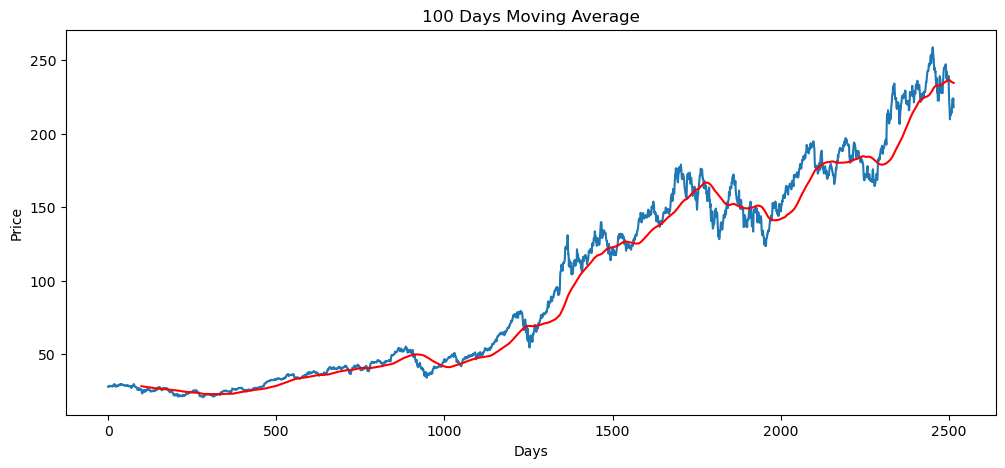

In [21]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close)
plt.plot(df.MA_100, 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

## 200 Days Moving Average

In [22]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400,NaN,NaN
1,2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600,NaN,NaN
2,2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400,NaN,NaN
3,2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000,NaN,NaN
4,2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200,NaN,NaN


In [23]:
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-31,27.788664,28.248718,27.773031,28.159387,168362400,NaN,NaN
1,2015-04-01,27.748466,27.942762,27.491639,27.875763,162485600,NaN,NaN
2,2015-04-02,27.987429,28.041027,27.735069,27.922663,128880400,NaN,NaN
3,2015-04-06,28.440779,28.476512,27.766330,27.797596,148776000,NaN,NaN
4,2015-04-07,28.141521,28.612741,28.134822,28.505545,140049200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-01-12,22.614941,22.780097,22.361551,22.748423,196616800,25.412378,NaN
199,2016-01-13,22.033508,22.893221,22.013148,22.696391,249758400,25.378940,26.766218
200,2016-01-14,22.515398,22.732590,21.660211,22.162464,252680400,25.365843,26.739852


Text(0, 0.5, 'Price')

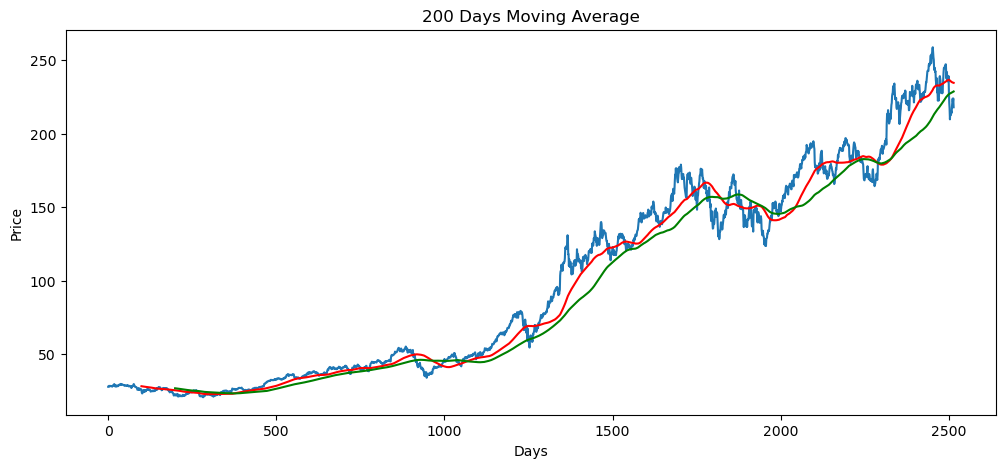

In [24]:
plt.figure(figsize=(12, 5));
plt.plot(df.Close)
plt.plot(df.MA_100, 'r')
plt.plot(df.MA_200, 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### Calculate % change in each trading session

In [25]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,27.788664,NaN
1,27.748466,-0.001447
2,27.987429,0.008612
3,28.440779,0.016198
4,28.141521,-0.010522
...,...,...
2510,220.729996,0.011270
2511,223.750000,0.013682
2512,221.529999,-0.009922


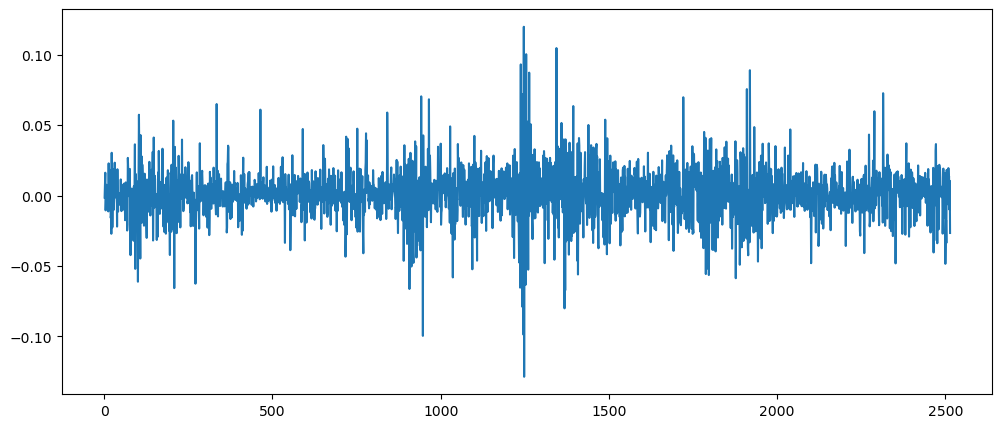

In [26]:
plt.figure(figsize=(12, 5));
plt.plot(df['Percentage Changed']);

## 4. Data Preprocessing

In [27]:
df.shape

(2515, 9)

In [28]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):])
print(data_training)
print(data_testing)

Ticker        AAPL
0        27.788664
1        27.748466
2        27.987429
3        28.440779
4        28.141521
...            ...
1755    161.365311
1756    162.743011
1757    166.128174
1758    167.495987
1759    171.294418

[1760 rows x 1 columns]
Ticker        AAPL
1760    171.934067
1761    172.800034
1762    176.106430
1763    174.935440
1764    171.825821
...            ...
2510    220.729996
2511    223.750000
2512    221.529999
2513    223.850006
2514    217.899994

[755 rows x 1 columns]


In [29]:
# Scaling down the data between 0 and 1

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [31]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0449677 ],
       [0.04471362],
       [0.04622408],
       ...,
       [0.91939765],
       [0.92804346],
       [0.95205296]])

In [32]:
type(data_training_array)

numpy.ndarray

In [33]:
data_training_array.shape

(1760, 1)

## 5. Sequence Creation

In [34]:
# 12, 15, 10, 14, 16, 18, 19, 20, 21, 20     22

In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
x_train

array([[[0.0449677 ],
        [0.04471362],
        [0.04622408],
        ...,
        [0.03520792],
        [0.03308626],
        [0.02972573]],

       [[0.04471362],
        [0.04622408],
        [0.04908965],
        ...,
        [0.03308626],
        [0.02972573],
        [0.01991468]],

       [[0.04622408],
        [0.04908965],
        [0.04719808],
        ...,
        [0.02972573],
        [0.01991468],
        [0.01615556]],

       ...,

       [[0.7926562 ],
        [0.81573187],
        [0.79854915],
        ...,
        [0.86839259],
        [0.88929208],
        [0.89800038]],

       [[0.81573187],
        [0.79854915],
        [0.79333858],
        ...,
        [0.88929208],
        [0.89800038],
        [0.91939765]],

       [[0.79854915],
        [0.79333858],
        [0.79991391],
        ...,
        [0.89800038],
        [0.91939765],
        [0.92804346]]])

In [37]:
y_train

array([0.01991468, 0.01615556, 0.01703836, ..., 0.91939765, 0.92804346,
       0.95205296])

In [38]:
x_train.shape

(1660, 100, 1)

In [39]:
y_train.shape

(1660,)

In [40]:
x_train.ndim

3

## 6. Model Building

In [43]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [44]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [46]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model Training

In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 214ms/step - loss: 0.0403
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 4.3024e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 3.9191e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - loss: 3.5741e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 3.8433e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 3.8916e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - loss: 3.6125e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 3.1523e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - loss: 3.2759e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 3.1049e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 2.9182e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - loss: 2.6438e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 2.7476e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 3.

In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [51]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing Test Data

In [52]:
data_testing

Ticker,AAPL
1760,171.934067
1761,172.800034
1762,176.106430
1763,174.935440
1764,171.825821
...,...
2510,220.729996
2511,223.750000
2512,221.529999
2513,223.850006


In [53]:
past_100_days = data_training.tail(100)

In [54]:
past_100_days

Ticker,AAPL
1660,146.184952
1661,147.225204
1662,148.667831
1663,148.147690
1664,148.678391
...,...
1755,161.365311
1756,162.743011
1757,166.128174
1758,167.495987


In [56]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,146.184952
1,147.225204
2,148.667831
3,148.147690
4,148.678391
...,...
850,220.729996
851,223.750000
852,221.529999
853,223.850006


In [57]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.67232336e-01],
       [1.74929223e-01],
       [1.85603298e-01],
       [1.81754742e-01],
       [1.85681425e-01],
       [1.79573163e-01],
       [1.82263698e-01],
       [1.61248152e-01],
       [1.60884612e-01],
       [1.76300739e-01],
       [1.76373560e-01],
       [1.83645488e-01],
       [2.01752037e-01],
       [2.33602767e-01],
       [2.53091106e-01],
       [2.56508833e-01],
       [2.59345009e-01],
       [2.63199098e-01],
       [2.25894478e-01],
       [2.50836932e-01],
       [2.87632145e-01],
       [2.83778282e-01],
       [2.76433533e-01],
       [2.62471566e-01],
       [2.87777561e-01],
       [3.30390428e-01],
       [3.58750497e-01],
       [3.54969117e-01],
       [3.90528294e-01],
       [3.63550015e-01],
       [3.53296720e-01],
       [3.89437674e-01],
       [3.38243795e-01],
       [3.30099596e-01],
       [3.19991943e-01],
       [3.43552494e-01],
       [3.62822597e-01],
       [3.67476586e-01],
       [3.96927613e-01],
       [3.89364853e-01],


In [58]:
input_data.shape

(855, 1)

In [60]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [61]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [68]:
x_test

array([[[0.16723234],
        [0.17492922],
        [0.1856033 ],
        ...,
        [0.31479332],
        [0.32491385],
        [0.35301865]],

       [[0.17492922],
        [0.1856033 ],
        [0.18175474],
        ...,
        [0.32491385],
        [0.35301865],
        [0.35775144]],

       [[0.1856033 ],
        [0.18175474],
        [0.18568143],
        ...,
        [0.35301865],
        [0.35775144],
        [0.36415878]],

       ...,

       [[0.81074211],
        [0.78438557],
        [0.7534516 ],
        ...,
        [0.70059356],
        [0.71879517],
        [0.74114035]],

       [[0.78438557],
        [0.7534516 ],
        [0.73130321],
        ...,
        [0.71879517],
        [0.74114035],
        [0.72471444]],

       [[0.7534516 ],
        [0.73130321],
        [0.72465855],
        ...,
        [0.74114035],
        [0.72471444],
        [0.7418803 ]]])

In [67]:
y_test

array([3.57751440e-01, 3.64158775e-01, 3.88622983e-01, 3.79958764e-01,
       3.56950523e-01, 3.54766009e-01, 3.84836748e-01, 3.60226899e-01,
       3.36709137e-01, 3.38966246e-01, 3.24040108e-01, 2.92440243e-01,
       3.06347114e-01, 3.26297104e-01, 2.89090933e-01, 2.87489099e-01,
       3.04453771e-01, 3.03216042e-01, 2.97318565e-01, 2.63607120e-01,
       2.71543582e-01, 2.27274688e-01, 2.25599920e-01, 2.77076954e-01,
       2.33463560e-01, 2.35720669e-01, 2.46787526e-01, 2.94405955e-01,
       2.27056112e-01, 2.32451971e-01, 1.94388772e-01, 2.12253826e-01,
       1.53846614e-01, 1.25116796e-01, 1.58294560e-01, 1.46846438e-01,
       1.73826184e-01, 1.12429364e-01, 8.71270949e-02, 8.88769415e-02,
       1.29127703e-01, 1.09075199e-01, 1.10242027e-01, 1.34012912e-01,
       1.76742971e-01, 1.70909396e-01, 1.69961709e-01, 1.88190980e-01,
       1.45679948e-01, 1.51221675e-01, 1.69961709e-01, 1.64492690e-01,
       1.25700266e-01, 8.55228901e-02, 4.72410026e-02, 5.36575959e-02,
      

In [69]:
x_test[0].shape

(100, 1)

## 9. Making Predictions

In [70]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step 


In [71]:
y_predicted

array([[0.35156414],
       [0.36527508],
       [0.37333196],
       [0.3873345 ],
       [0.39161783],
       [0.38001043],
       [0.36878517],
       [0.37739602],
       [0.37520722],
       [0.36085472],
       [0.35168344],
       [0.3410479 ],
       [0.32060462],
       [0.3136382 ],
       [0.3223139 ],
       [0.31471118],
       [0.30605093],
       [0.3083474 ],
       [0.31185576],
       [0.31158724],
       [0.29519963],
       [0.28508162],
       [0.26124972],
       [0.24335034],
       [0.25584644],
       [0.25347188],
       [0.2496753 ],
       [0.25171652],
       [0.2750016 ],
       [0.26573572],
       [0.25383285],
       [0.22958113],
       [0.21894366],
       [0.19266692],
       [0.16206127],
       [0.15386145],
       [0.15088218],
       [0.16105211],
       [0.14956506],
       [0.12711376],
       [0.10971484],
       [0.11304157],
       [0.1150838 ],
       [0.11672719],
       [0.12613468],
       [0.15057379],
       [0.16970485],
       [0.179

In [72]:
y_test

array([3.57751440e-01, 3.64158775e-01, 3.88622983e-01, 3.79958764e-01,
       3.56950523e-01, 3.54766009e-01, 3.84836748e-01, 3.60226899e-01,
       3.36709137e-01, 3.38966246e-01, 3.24040108e-01, 2.92440243e-01,
       3.06347114e-01, 3.26297104e-01, 2.89090933e-01, 2.87489099e-01,
       3.04453771e-01, 3.03216042e-01, 2.97318565e-01, 2.63607120e-01,
       2.71543582e-01, 2.27274688e-01, 2.25599920e-01, 2.77076954e-01,
       2.33463560e-01, 2.35720669e-01, 2.46787526e-01, 2.94405955e-01,
       2.27056112e-01, 2.32451971e-01, 1.94388772e-01, 2.12253826e-01,
       1.53846614e-01, 1.25116796e-01, 1.58294560e-01, 1.46846438e-01,
       1.73826184e-01, 1.12429364e-01, 8.71270949e-02, 8.88769415e-02,
       1.29127703e-01, 1.09075199e-01, 1.10242027e-01, 1.34012912e-01,
       1.76742971e-01, 1.70909396e-01, 1.69961709e-01, 1.88190980e-01,
       1.45679948e-01, 1.51221675e-01, 1.69961709e-01, 1.64492690e-01,
       1.25700266e-01, 8.55228901e-02, 4.72410026e-02, 5.36575959e-02,
      

In [73]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [74]:
y_predicted

array([171.09784, 172.95091, 174.03983, 175.93228, 176.5112 , 174.94243,
       173.4253 , 174.58908, 174.29326, 172.35349, 171.11397, 169.67654,
       166.91359, 165.97206, 167.14459, 166.11708, 164.94661, 165.257  ,
       165.73116, 165.69485, 163.48004, 162.11256, 158.89163, 156.47249,
       158.16136, 157.84042, 157.32732, 157.6032 , 160.75023, 159.49792,
       157.88922, 154.61154, 153.17387, 149.6225 , 145.48608, 144.37784,
       143.97519, 145.34969, 143.79718, 140.76283, 138.41133, 138.86093,
       139.13695, 139.35907, 140.6305 , 143.93352, 146.51912, 147.89014,
       149.27821, 147.83319, 146.32779, 146.25798, 146.34093, 144.49164,
       140.83736, 136.26047, 133.27684, 132.52678, 131.12048, 130.42531,
       131.51347, 132.79814, 134.7291 , 137.44087, 139.56396, 139.27664,
       138.85812, 137.61014, 137.2273 , 138.11765, 139.61494, 142.06137,
       144.26903, 144.82787, 145.00954, 144.82584, 145.67204, 147.1572 ,
       147.12866, 148.15408, 149.89561, 152.12976, 

In [75]:
y_test

array([171.93406677, 172.80003357, 176.10643005, 174.93544006,
       171.82582092, 171.53057861, 175.5947113 , 172.26863098,
       169.09014893, 169.39520264, 167.37789917, 163.10710144,
       164.98664856, 167.68293762, 162.6544342 , 162.4379425 ,
       164.73075867, 164.56347656, 163.76641846, 159.2102356 ,
       160.28286743, 154.29981995, 154.07347107, 161.03071594,
       155.13626099, 155.4413147 , 156.93702698, 163.37277222,
       154.27027893, 154.99954224, 149.85520935, 152.26971436,
       144.37583923, 140.49293518, 144.97698975, 143.42974854,
       147.0761261 , 138.77819824, 135.35853577, 135.59503174,
       141.03501892, 138.32487488, 138.48257446, 141.69526672,
       147.47033691, 146.68191528, 146.55383301, 149.01756287,
       143.27209473, 144.02107239, 146.55383301, 145.81468201,
       140.5717926 , 135.14172363, 129.96783447, 130.83505249,
       133.46633911, 128.17419434, 129.65246582, 133.89997864,
       133.38752747, 136.26519775, 139.60604858, 139.60

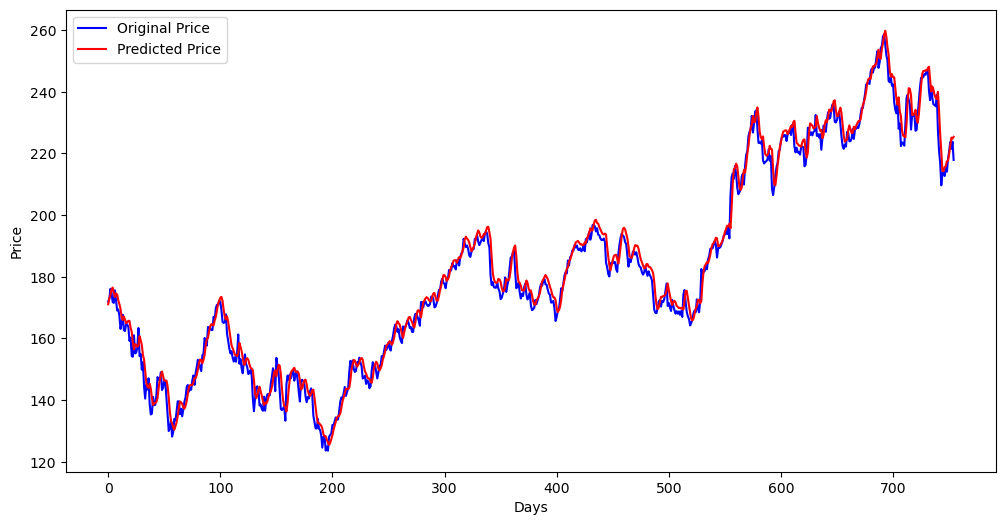

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original Price");
plt.plot(y_predicted, 'r', label="Predicted Price");
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

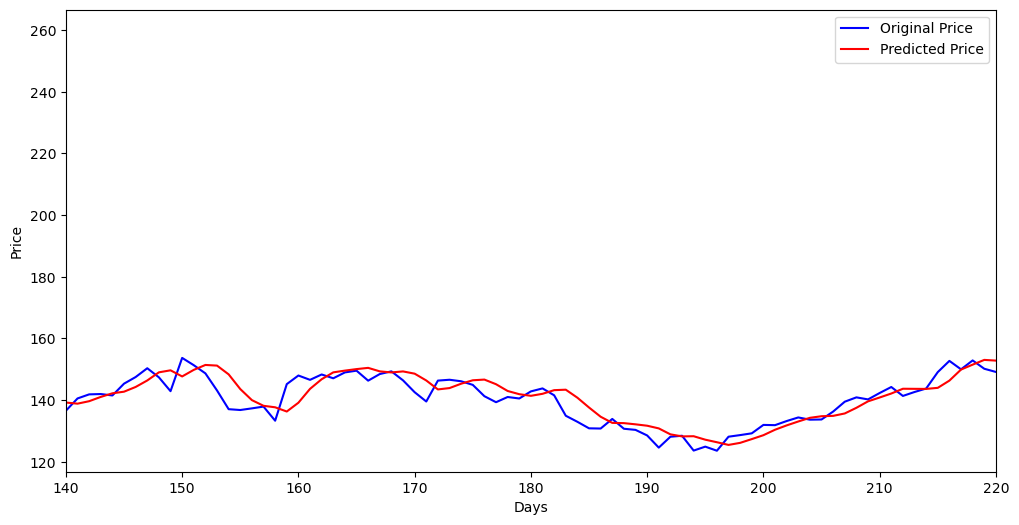

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original Price");
plt.plot(y_predicted, 'r', label="Predicted Price");
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.xlim(140, 220)

## 10. Model Evaluation

In [89]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 13.470272966863934


In [91]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.6701870479396463


In [93]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9874792726765776
